In [1]:
import pandas as pd
import numpy as np

# 1. Reading the data

In [2]:
#reading data without heading after converting .FILE to xlsx
data=pd.read_excel("SMSSpamCollection.xlsx",header=None,index_col=False)

In [3]:
data

0                                                  1
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [4]:
#renaming columns appropriately
data.rename(columns={0:"Labels",1:"SMS"},inplace=True)

In [5]:
data

Labels                                                SMS
0       ham  Go until jurong point, crazy.. Available only ...
1       ham                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3       ham  U dun say so early hor... U c already then say...
4       ham  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567   spam  This is the 2nd time we have tried 2 contact u...
5568    ham               Will ü b going to esplanade fr home?
5569    ham  Pity, * was in mood for that. So...any other s...
5570    ham  The guy did some bitching but I acted like i'd...
5571    ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [6]:
data["Labels"]=data["Labels"].map({"ham":0,"spam":1})

In [7]:
data

Labels                                                SMS
0          0  Go until jurong point, crazy.. Available only ...
1          0                      Ok lar... Joking wif u oni...
2          1  Free entry in 2 a wkly comp to win FA Cup fina...
3          0  U dun say so early hor... U c already then say...
4          0  Nah I don't think he goes to usf, he lives aro...
...      ...                                                ...
5567       1  This is the 2nd time we have tried 2 contact u...
5568       0               Will ü b going to esplanade fr home?
5569       0  Pity, * was in mood for that. So...any other s...
5570       0  The guy did some bitching but I acted like i'd...
5571       0                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [8]:
data.dtypes

Labels     int64
SMS       object
dtype: object

In [9]:
#Checking for imbalance
len(data.loc[data.Labels==1])/len(data)
#Data is highly imbalanced

0.13406317300789664

In [10]:
import warnings
warnings.filterwarnings("ignore")
import nltk

# 2 Text Preprocessing

In [11]:
#converting strings to lowercase
data["SMS"]=data["SMS"].str.lower()

In [12]:
data

Labels                                                SMS
0          0  go until jurong point, crazy.. available only ...
1          0                      ok lar... joking wif u oni...
2          1  free entry in 2 a wkly comp to win fa cup fina...
3          0  u dun say so early hor... u c already then say...
4          0  nah i don't think he goes to usf, he lives aro...
...      ...                                                ...
5567       1  this is the 2nd time we have tried 2 contact u...
5568       0               will ü b going to esplanade fr home?
5569       0  pity, * was in mood for that. so...any other s...
5570       0  the guy did some bitching but i acted like i'd...
5571       0                         rofl. its true to its name

[5572 rows x 2 columns]

In [13]:
#Removing punctuations
import string
p = string.punctuation
remv_punc = str.maketrans("", "", p)

In [14]:
data["SMS"]=data["SMS"].str.translate(remv_punc)

In [15]:
data

Labels                                                SMS
0          0  go until jurong point crazy available only in ...
1          0                            ok lar joking wif u oni
2          1  free entry in 2 a wkly comp to win fa cup fina...
3          0        u dun say so early hor u c already then say
4          0  nah i dont think he goes to usf he lives aroun...
...      ...                                                ...
5567       1  this is the 2nd time we have tried 2 contact u...
5568       0                will ü b going to esplanade fr home
5569       0  pity  was in mood for that soany other suggest...
5570       0  the guy did some bitching but i acted like id ...
5571       0                          rofl its true to its name

[5572 rows x 2 columns]

In [16]:
#removing stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

In [17]:
data.dtypes

Labels     int64
SMS       object
dtype: object

In [18]:
data["SMS"]=data["SMS"].apply(lambda x: ' '.join([w for w in str(x).split() if w not in stop_words]))

In [19]:
data

Labels                                                SMS
0          0  go jurong point crazy available bugis n great ...
1          0                            ok lar joking wif u oni
2          1  free entry 2 wkly comp win fa cup final tkts 2...
3          0                u dun say early hor u c already say
4          0        nah dont think goes usf lives around though
...      ...                                                ...
5567       1  2nd time tried 2 contact u u £750 pound prize ...
5568       0                        ü b going esplanade fr home
5569       0                        pity mood soany suggestions
5570       0  guy bitching acted like id interested buying s...
5571       0                                     rofl true name

[5572 rows x 2 columns]

In [20]:
#removing whitespace
data["SMS"]=data["SMS"].str.replace('  ',' ')

# 3 Data Exploration

In [21]:
#lematizing words instead of portstemmer since it changes meaning of word.
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
#nltk.download('wordnet')
#nltk.download("omw-1.4")

In [22]:
data["SMS"]=data["SMS"].apply(lambda x: ' '.join([lemmatizer.lemmatize(w) for w in x.split()]))

In [23]:
data

Labels                                                SMS
0          0  go jurong point crazy available bugis n great ...
1          0                            ok lar joking wif u oni
2          1  free entry 2 wkly comp win fa cup final tkts 2...
3          0                u dun say early hor u c already say
4          0           nah dont think go usf life around though
...      ...                                                ...
5567       1  2nd time tried 2 contact u u £750 pound prize ...
5568       0                        ü b going esplanade fr home
5569       0                         pity mood soany suggestion
5570       0  guy bitching acted like id interested buying s...
5571       0                                     rofl true name

[5572 rows x 2 columns]

In [24]:
#data.to_csv("LemmatizedSpamData.csv",index=False)

In [26]:
import matplotlib.pyplot as plt
#!pip install wordcloud
from wordcloud import WordCloud

In [27]:
#Spam and ham sms
s=""
h=""
for i in range(data.shape[0]):
    if data.Labels[i]==0:
        h=h+data.SMS[i]
    else:
        s=s+data.SMS[i]

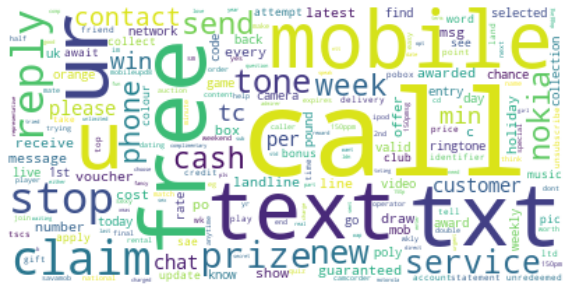

In [28]:
#Wordcloud for spam
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(s)
plt.figure(figsize=(10,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

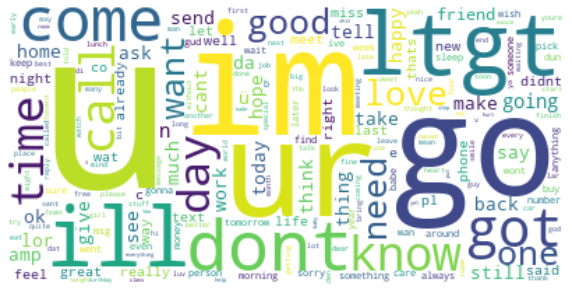

In [29]:
#Wordcloud for ham
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(h)
plt.figure(figsize=(10,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 4 Vectorization

1. TF 

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
cv=CountVectorizer()
DTM=pd.DataFrame(cv.fit_transform(data.SMS).toarray(),columns=cv.get_feature_names())

In [32]:
DTM

008704050406  0089my  0121  01223585236  01223585334  0125698789  02  \
0                0       0     0            0            0           0   0   
1                0       0     0            0            0           0   0   
2                0       0     0            0            0           0   0   
3                0       0     0            0            0           0   0   
4                0       0     0            0            0           0   0   
...            ...     ...   ...          ...          ...         ...  ..   
5567             0       0     0            0            0           0   0   
5568             0       0     0            0            0           0   0   
5569             0       0     0            0            0           0   0   
5570             0       0     0            0            0           0   0   
5571             0       0     0            0            0           0   0   

      020603  0207  02070836089  ...  zero  zhong  zindgi  zoe  zogtorius  \
0          0     0            0  ...     0      0       0    0          0   
1          0     0            0  ...     0      0       0    0          0   
2          0     0            0  ...     0      0       0    0          0   
3          0     0            0  ...     0      0       0    0          0   
4          0     0            0  ...     0      0       0    0          0   
...      ...   ...          ...  ...   ...    ...     ...  ...        ...   
5567       0     0            0  ...     0      0       0    0          0   
5568       0     0            0  ...     0      0       0    0          0   
5569       0     0            0  ...     0      0       0    0          0   
5570       0     0            0  ...     0      0       0    0          0   
5571       0     0            0  ...     0      0       0    0          0   

      zoom  zouk  zyada  üll  〨ud  
0        0     0      0    0    0  
1        0     0      0    0    0  
2        0     0      0    0    0  
3        0     0      0    0    0  
4        0     0      0    0    0  
...    ...   ...    ...  ...  ...  
5567     0     0      0    0    0  
5568     0     0      0    0    0  
5569     0     0      0    0    0  
5570     0     0      0    0    0  
5571     0     0      0    0    0  

[5572 rows x 8907 columns]

In [33]:
DTM_=DTM.copy()
DTM_['Labels']=data['Labels']

In [34]:
DTM_

008704050406  0089my  0121  01223585236  01223585334  0125698789  02  \
0                0       0     0            0            0           0   0   
1                0       0     0            0            0           0   0   
2                0       0     0            0            0           0   0   
3                0       0     0            0            0           0   0   
4                0       0     0            0            0           0   0   
...            ...     ...   ...          ...          ...         ...  ..   
5567             0       0     0            0            0           0   0   
5568             0       0     0            0            0           0   0   
5569             0       0     0            0            0           0   0   
5570             0       0     0            0            0           0   0   
5571             0       0     0            0            0           0   0   

      020603  0207  02070836089  ...  zhong  zindgi  zoe  zogtorius  zoom  \
0          0     0            0  ...      0       0    0          0     0   
1          0     0            0  ...      0       0    0          0     0   
2          0     0            0  ...      0       0    0          0     0   
3          0     0            0  ...      0       0    0          0     0   
4          0     0            0  ...      0       0    0          0     0   
...      ...   ...          ...  ...    ...     ...  ...        ...   ...   
5567       0     0            0  ...      0       0    0          0     0   
5568       0     0            0  ...      0       0    0          0     0   
5569       0     0            0  ...      0       0    0          0     0   
5570       0     0            0  ...      0       0    0          0     0   
5571       0     0            0  ...      0       0    0          0     0   

      zouk  zyada  üll  〨ud  Labels  
0        0      0    0    0       0  
1        0      0    0    0       0  
2        0      0    0    0       1  
3        0      0    0    0       0  
4        0      0    0    0       0  
...    ...    ...  ...  ...     ...  
5567     0      0    0    0       1  
5568     0      0    0    0       0  
5569     0      0    0    0       0  
5570     0      0    0    0       0  
5571     0      0    0    0       0  

[5572 rows x 8908 columns]

In [35]:
#DTM_.to_csv("DTM Lemmatized.csv",index=False)

2. TF IDF

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
tfidf_vectors=pd.DataFrame(tfidf.fit_transform(data.SMS).toarray(),columns=tfidf.get_feature_names())

In [37]:
tfidf_vectors

008704050406  0089my  0121  01223585236  01223585334  0125698789   02  \
0              0.0     0.0   0.0          0.0          0.0         0.0  0.0   
1              0.0     0.0   0.0          0.0          0.0         0.0  0.0   
2              0.0     0.0   0.0          0.0          0.0         0.0  0.0   
3              0.0     0.0   0.0          0.0          0.0         0.0  0.0   
4              0.0     0.0   0.0          0.0          0.0         0.0  0.0   
...            ...     ...   ...          ...          ...         ...  ...   
5567           0.0     0.0   0.0          0.0          0.0         0.0  0.0   
5568           0.0     0.0   0.0          0.0          0.0         0.0  0.0   
5569           0.0     0.0   0.0          0.0          0.0         0.0  0.0   
5570           0.0     0.0   0.0          0.0          0.0         0.0  0.0   
5571           0.0     0.0   0.0          0.0          0.0         0.0  0.0   

      020603  0207  02070836089  ...  zero  zhong  zindgi  zoe  zogtorius  \
0        0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0        0.0   
1        0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0        0.0   
2        0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0        0.0   
3        0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0        0.0   
4        0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0        0.0   
...      ...   ...          ...  ...   ...    ...     ...  ...        ...   
5567     0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0        0.0   
5568     0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0        0.0   
5569     0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0        0.0   
5570     0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0        0.0   
5571     0.0   0.0          0.0  ...   0.0    0.0     0.0  0.0        0.0   

      zoom  zouk  zyada  üll  〨ud  
0      0.0   0.0    0.0  0.0  0.0  
1      0.0   0.0    0.0  0.0  0.0  
2      0.0   0.0    0.0  0.0  0.0  
3      0.0   0.0    0.0  0.0  0.0  
4      0.0   0.0    0.0  0.0  0.0  
...    ...   ...    ...  ...  ...  
5567   0.0   0.0    0.0  0.0  0.0  
5568   0.0   0.0    0.0  0.0  0.0  
5569   0.0   0.0    0.0  0.0  0.0  
5570   0.0   0.0    0.0  0.0  0.0  
5571   0.0   0.0    0.0  0.0  0.0  

[5572 rows x 8907 columns]

In [38]:
tfidf_vectors_=tfidf_vectors.copy()

In [39]:
tfidf_vectors_['Labels']=data["Labels"]

In [40]:
tfidf_vectors_

008704050406  0089my  0121  01223585236  01223585334  0125698789   02  \
0              0.0     0.0   0.0          0.0          0.0         0.0  0.0   
1              0.0     0.0   0.0          0.0          0.0         0.0  0.0   
2              0.0     0.0   0.0          0.0          0.0         0.0  0.0   
3              0.0     0.0   0.0          0.0          0.0         0.0  0.0   
4              0.0     0.0   0.0          0.0          0.0         0.0  0.0   
...            ...     ...   ...          ...          ...         ...  ...   
5567           0.0     0.0   0.0          0.0          0.0         0.0  0.0   
5568           0.0     0.0   0.0          0.0          0.0         0.0  0.0   
5569           0.0     0.0   0.0          0.0          0.0         0.0  0.0   
5570           0.0     0.0   0.0          0.0          0.0         0.0  0.0   
5571           0.0     0.0   0.0          0.0          0.0         0.0  0.0   

      020603  0207  02070836089  ...  zhong  zindgi  zoe  zogtorius  zoom  \
0        0.0   0.0          0.0  ...    0.0     0.0  0.0        0.0   0.0   
1        0.0   0.0          0.0  ...    0.0     0.0  0.0        0.0   0.0   
2        0.0   0.0          0.0  ...    0.0     0.0  0.0        0.0   0.0   
3        0.0   0.0          0.0  ...    0.0     0.0  0.0        0.0   0.0   
4        0.0   0.0          0.0  ...    0.0     0.0  0.0        0.0   0.0   
...      ...   ...          ...  ...    ...     ...  ...        ...   ...   
5567     0.0   0.0          0.0  ...    0.0     0.0  0.0        0.0   0.0   
5568     0.0   0.0          0.0  ...    0.0     0.0  0.0        0.0   0.0   
5569     0.0   0.0          0.0  ...    0.0     0.0  0.0        0.0   0.0   
5570     0.0   0.0          0.0  ...    0.0     0.0  0.0        0.0   0.0   
5571     0.0   0.0          0.0  ...    0.0     0.0  0.0        0.0   0.0   

      zouk  zyada  üll  〨ud  Labels  
0      0.0    0.0  0.0  0.0       0  
1      0.0    0.0  0.0  0.0       0  
2      0.0    0.0  0.0  0.0       1  
3      0.0    0.0  0.0  0.0       0  
4      0.0    0.0  0.0  0.0       0  
...    ...    ...  ...  ...     ...  
5567   0.0    0.0  0.0  0.0       1  
5568   0.0    0.0  0.0  0.0       0  
5569   0.0    0.0  0.0  0.0       0  
5570   0.0    0.0  0.0  0.0       0  
5571   0.0    0.0  0.0  0.0       0  

[5572 rows x 8908 columns]

In [41]:
#tfidf_vectors_.to_csv("tfidf vec lemmatized.csv")

3. Doc2Vec

In [42]:
import nltk
from gensim.models import KeyedVectors
import pickle # Python object serialization library. Not secure

In [43]:
embeddings = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary = True,unicode_errors='ignore')

In [44]:
def vec(w):
    return(embeddings[w])

In [45]:
#saving words in embeddings to variable word
word=embeddings.index_to_key

In [46]:
data2=data.copy()

In [47]:
#removing words not in embedding to prevent error when doc2vec
data2.SMS=data2.SMS.apply(lambda x: ' '.join([w for w in x.split() if w in word]))
data2=data2.loc[data2.SMS!=""]

In [48]:
data2=data2.reset_index()

In [49]:
doc2vec=[]
for i in range(0,len(data2)):
    print(i)
    vdoc=[vec(x) for x in data2.SMS[i].split(" ")]
    d2v=np.sum(vdoc,axis=0)
    doc2vec.append(d2v)
array=np.array(doc2vec)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256


4222
4223
4224
4225
4226
4227
4228
4229
4230
4231
4232
4233
4234
4235
4236
4237
4238
4239
4240
4241
4242
4243
4244
4245
4246
4247
4248
4249
4250
4251
4252
4253
4254
4255
4256
4257
4258
4259
4260
4261
4262
4263
4264
4265
4266
4267
4268
4269
4270
4271
4272
4273
4274
4275
4276
4277
4278
4279
4280
4281
4282
4283
4284
4285
4286
4287
4288
4289
4290
4291
4292
4293
4294
4295
4296
4297
4298
4299
4300
4301
4302
4303
4304
4305
4306
4307
4308
4309
4310
4311
4312
4313
4314
4315
4316
4317
4318
4319
4320
4321
4322
4323
4324
4325
4326
4327
4328
4329
4330
4331
4332
4333
4334
4335
4336
4337
4338
4339
4340
4341
4342
4343
4344
4345
4346
4347
4348
4349
4350
4351
4352
4353
4354
4355
4356
4357
4358
4359
4360
4361
4362
4363
4364
4365
4366
4367
4368
4369
4370
4371
4372
4373
4374
4375
4376
4377
4378
4379
4380
4381
4382
4383
4384
4385
4386
4387
4388
4389
4390
4391
4392
4393
4394
4395
4396
4397
4398
4399
4400
4401
4402
4403
4404
4405
4406
4407
4408
4409
4410
4411
4412
4413
4414
4415
4416
4417
4418
4419
4420
4421


In [50]:
data2.drop('index',inplace=True,axis=1)

In [51]:
data2

Labels                                                SMS
0          0  go point crazy available n great world la e bu...
1          0                            ok lar joking wif u oni
2          1  free entry 2 wkly comp win fa cup final tkts m...
3          0                u dun say early hor u c already say
4          0           nah dont think go usf life around though
...      ...                                                ...
5544       1  2nd time tried 2 contact u u pound prize 2 cla...
5545       0                        ü b going esplanade fr home
5546       0                               pity mood suggestion
5547       0  guy bitching acted like id interested buying s...
5548       0                                     rofl true name

[5549 rows x 2 columns]

In [52]:
doc2vector=pd.DataFrame()

In [53]:
#creating an empty dataframe with vectors0-299
for i in range(0,300):
    doc2vector['vec'+str(i)]=0

In [54]:
#adding values from doc2vec to vectors,using column names from empty data
doc2vector1=pd.DataFrame(array,columns=doc2vector.columns)

In [55]:
doc2vector_=doc2vector1.copy()
doc2vector_['Labels']=data2['Labels']

In [56]:
#doc2vector_.to_csv("doc2vec lemmatized.csv")

In [57]:
doc2vector_

vec0      vec1      vec2      vec3      vec4      vec5      vec6  \
0    -0.277283  0.723389  0.379395  3.061523 -0.434479  0.545715  1.147522   
1    -0.379410  0.482300  0.365662  0.614990 -0.473145  0.211426 -0.318237   
2     0.013405 -0.507935 -1.219238  1.262939  1.145691  0.447624 -0.142944   
3    -0.591125  0.235931  0.973389  0.782776 -1.006348  0.004631 -0.400513   
4    -0.017334  0.174103  0.482910  1.635254 -0.081909  0.170654  0.469482   
...        ...       ...       ...       ...       ...       ...       ...   
5544  0.369385  0.369507  0.555893  0.707397  0.026978  0.154495  0.753265   
5545  0.082275  0.609375  0.881897  0.534882 -0.372559 -0.103668 -0.495239   
5546  0.279297  0.288086  0.078979  0.374023 -0.481201  0.080322  0.370117   
5547  1.306641  0.221680 -0.038303  0.984558 -1.392730  0.322998  0.497070   
5548  0.335938  0.203827  0.261719  0.227295 -0.516602  0.152832  0.186035   

          vec7      vec8      vec9  ...    vec291    vec292    vec293  \
0    -1.344482  0.200500  1.083086  ...  0.594177 -1.650635  1.291077   
1    -0.440613  0.060303  0.483765  ...  0.634033 -0.806580 -0.247925   
2    -1.488251  0.719482  2.141296  ...  0.372314 -0.242859 -0.183105   
3    -0.938232 -0.049805  1.060059  ...  0.553711 -0.416077 -0.128418   
4    -0.755653  0.801514  0.579729  ...  1.142700 -1.031738  0.473999   
...        ...       ...       ...  ...       ...       ...       ...   
5544 -0.879150  0.492676  0.767578  ...  0.561523 -1.546539 -0.365051   
5545 -0.853235 -0.050903  0.235474  ...  0.625732 -0.785538  0.454285   
5546 -0.323242  0.390137  0.310059  ...  0.285339  0.061035 -0.418213   
5547 -1.119659  0.117004  1.303467  ...  1.104706 -1.399956  0.684998   
5548 -0.004272  0.345215  0.237061  ...  0.400879 -0.501587 -0.117920   

        vec294    vec295    vec296    vec297    vec298    vec299  Labels  
0     0.080200 -0.458130  0.387207 -1.118958 -0.733032  0.424713       0  
1    -1.007812 -0.972656 -0.836426 -0.685150 -0.437256  0.655273       0  
2     0.231079  0.006836 -0.082611 -2.170883 -1.645866  0.184910       1  
3    -0.598145 -1.251221 -0.859444 -0.646484 -0.136230  0.998901       0  
4    -1.153290 -0.087158  0.000488 -0.525269  0.182430  0.124390       0  
...        ...       ...       ...       ...       ...       ...     ...  
5544 -0.767822 -0.651489 -1.248291 -1.118362 -0.477661 -0.068848       1  
5545 -0.070435 -0.453125 -0.501099 -0.663574 -0.010742  0.536987       0  
5546 -0.036011  0.062134  0.321014 -0.225098 -0.125977 -0.002808       0  
5547 -0.376984 -0.350220  0.276154 -1.164551 -0.465218 -0.255318       0  
5548  0.074280 -0.351562  0.083008 -0.152832 -0.416946  0.057129       0  

[5549 rows x 301 columns]

4 Creating Heuristic features(to do later)

# 5 Dimension Reduction

a. PCA

PCA on TF

In [58]:
from sklearn.decomposition import PCA
#pca which explains 95 % of variance
pca=PCA(0.95)

In [59]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
DTM_scaled=pd.DataFrame(mms.fit_transform(DTM),columns=DTM.columns)

In [60]:
pca_dtm=pd.DataFrame(pca.fit_transform(DTM_scaled))

In [61]:
pca_dtm

0         1         2         3         4         5         6     \
0    -0.028000 -0.149831  0.248418  0.178839 -0.049599 -0.007751 -0.024498   
1    -0.073275 -0.004264  0.049374 -0.051807 -0.034109  0.000827 -0.028799   
2     0.187571  0.120219 -0.359859  0.254448 -0.028785 -0.096382 -0.456846   
3    -0.079153 -0.002995  0.045754 -0.040358 -0.024386 -0.025911 -0.021215   
4    -0.087756 -0.001550  0.037746 -0.030957  0.042937 -0.003207  0.024838   
...        ...       ...       ...       ...       ...       ...       ...   
5567  0.759203 -0.471777 -0.464578 -0.385008 -0.368305  0.302602  0.493371   
5568 -0.073212 -0.001926  0.047805 -0.047168 -0.032722 -0.030371 -0.014697   
5569 -0.048338 -0.003522  0.030836 -0.036103 -0.000455  0.050900 -0.039069   
5570 -0.046354  0.010105 -0.061677  0.050656  0.008846 -0.016414  0.012220   
5571 -0.047400 -0.000417  0.020395 -0.023049 -0.037974 -0.025352 -0.035189   

          7         8         9     ...      2513      2514      2515  \
0    -0.071886  0.001577 -0.044448  ... -0.036382 -0.000231 -0.003001   
1    -0.023585 -0.021212 -0.009262  ... -0.003496  0.002480 -0.014833   
2    -0.262762 -0.005683  0.002309  ... -0.002248  0.004436  0.000288   
3    -0.015423 -0.022880 -0.009467  ...  0.005153  0.014051 -0.039118   
4     0.049486 -0.012329 -0.034892  ...  0.014655 -0.000998 -0.015997   
...        ...       ...       ...  ...       ...       ...       ...   
5567  0.290881 -0.227402 -0.073981  ...  0.030712 -0.111993 -0.008105   
5568 -0.013221 -0.003242  0.000394  ... -0.023434  0.001843 -0.007000   
5569 -0.019604 -0.027348  0.014904  ... -0.023801 -0.014344 -0.004212   
5570 -0.027765 -0.033711 -0.004398  ...  0.002452 -0.053757 -0.001927   
5571 -0.030836 -0.015367  0.004858  ... -0.027295 -0.000746  0.003133   

          2516      2517      2518      2519      2520      2521      2522  
0    -0.005948 -0.003716 -0.009424  0.001835  0.004292 -0.000314 -0.005900  
1     0.000978  0.015503 -0.006810  0.015236  0.010841  0.006419 -0.000540  
2     0.004943 -0.002126 -0.000076  0.003718 -0.001420  0.000198 -0.002588  
3     0.006046  0.002145  0.019304 -0.046784 -0.013804 -0.006308  0.048324  
4     0.009395 -0.007052 -0.003339  0.010410 -0.007253  0.000003 -0.012316  
...        ...       ...       ...       ...       ...       ...       ...  
5567 -0.032992  0.057234  0.009626  0.016800  0.007826 -0.081492 -0.059320  
5568  0.003854  0.006081  0.008417 -0.008260  0.006273 -0.005178  0.001958  
5569 -0.007557  0.009520 -0.010386 -0.001889  0.032305 -0.015364  0.005084  
5570 -0.049558 -0.010918  0.013562  0.039109 -0.015071 -0.010824  0.026043  
5571  0.021010 -0.002270  0.013857  0.001650 -0.003426 -0.024022  0.024823  

[5572 rows x 2523 columns]

In [62]:
pca_dtm_=pca_dtm.copy()
pca_dtm_['Labels']=data['Labels']
#pca_dtm_.to_csv("DTM pca lemmatized.csv",index=False)

PCA on TF IDF Vectors

In [63]:
tfidfvec_scaled=pd.DataFrame(mms.fit_transform(tfidf_vectors),columns=tfidf_vectors.columns)

In [64]:
pca_tfidfvec=pd.DataFrame(pca.fit_transform(tfidfvec_scaled))

In [65]:
pca_tfidfvec_=pca_tfidfvec.copy()
pca_tfidfvec_['Labels']=data['Labels']
#pca_tfidfvec_.to_csv("PCA TF Vec lemm1.csv",index=False)

In [66]:
pca_tfidfvec_

0         1         2         3         4         5         6  \
0    -0.034354 -0.022284 -0.025727  0.073779  0.048543 -0.015906  0.017778   
1    -0.042802 -0.010058 -0.001208  0.032338 -0.020154 -0.013413  0.026074   
2     0.157147 -0.099511  0.001493 -0.297635  0.150936 -0.133567  0.143874   
3    -0.055070 -0.030968 -0.002603  0.046079 -0.028366 -0.016813  0.018381   
4    -0.084195 -0.046831  0.000794  0.067794 -0.059480 -0.025874 -0.051710   
...        ...       ...       ...       ...       ...       ...       ...   
5567  0.364916  0.035491 -0.215809 -0.159494 -0.019202  0.525378 -0.292195   
5568 -0.050688 -0.015191  0.000018  0.041468 -0.029642 -0.003883  0.021222   
5569 -0.022519 -0.017715 -0.002711  0.018869 -0.008603 -0.001193  0.008922   
5570 -0.017057 -0.036439 -0.002463 -0.043608  0.025476 -0.010868 -0.015674   
5571 -0.023777 -0.026936 -0.003617  0.010160 -0.003995 -0.006991  0.013142   

             7         8         9  ...      2927      2928      2929  \
0    -0.045665  0.017810 -0.060104  ... -0.006169 -0.016093 -0.021294   
1    -0.072112  0.004186 -0.071606  ... -0.010443 -0.012395 -0.025772   
2     0.051986  0.402741  0.135250  ...  0.000607 -0.001156  0.001177   
3    -0.025528 -0.001078 -0.063794  ...  0.011234 -0.038073 -0.030017   
4     0.330360 -0.023491  0.039840  ... -0.013520 -0.003734  0.003848   
...        ...       ...       ...  ...       ...       ...       ...   
5567 -0.008898 -0.077536 -0.150568  ... -0.006643  0.000951 -0.006848   
5568 -0.114509 -0.004592  0.085059  ...  0.016655 -0.001741 -0.016858   
5569 -0.018742  0.003969 -0.033758  ...  0.004067 -0.004385  0.003908   
5570 -0.024115 -0.008772 -0.009811  ...  0.029652 -0.014986  0.014231   
5571 -0.021100  0.009190 -0.049147  ... -0.015015  0.020899  0.029898   

          2930      2931      2932      2933      2934      2935  Labels  
0     0.008824 -0.013749  0.000022 -0.001881 -0.009742 -0.001054       0  
1     0.005890  0.026876 -0.031542  0.002995 -0.008730 -0.018468       0  
2    -0.000647 -0.001896 -0.000034  0.001062 -0.000535  0.000537       1  
3     0.032862 -0.024792  0.032143  0.006936  0.040744  0.018119       0  
4    -0.011321 -0.001172  0.015452  0.004287 -0.004934  0.004898       0  
...        ...       ...       ...       ...       ...       ...     ...  
5567  0.003119 -0.010992  0.025817  0.018080  0.001790  0.022411       1  
5568  0.025344  0.013180  0.021450  0.008965  0.013180  0.005500       0  
5569  0.013050 -0.001547 -0.005364 -0.007780 -0.009376  0.002831       0  
5570  0.020008 -0.008114  0.011829  0.051761 -0.011664  0.018352       0  
5571  0.030488 -0.025465 -0.009391 -0.003265 -0.000154  0.012688       0  

[5572 rows x 2937 columns]

PCA on doc2vec

In [67]:
doc2vec_scaled=pd.DataFrame(mms.fit_transform(doc2vector1),columns=doc2vector1.columns)

In [68]:
pca_doc2vec=pd.DataFrame(pca.fit_transform(doc2vec_scaled))

In [69]:
pca_doc2vec_=pca_doc2vec.copy()
pca_doc2vec_['Labels']=data2['Labels']
#pca_doc2vec_.to_csv("PCA Doc2vec lemm1.csv",index=False)

In [70]:
pca_doc2vec

0         1         2         3         4         5         6    \
0     0.650415 -0.162726 -0.060958  0.177936 -0.035111  0.153825  0.044513   
1     0.102928 -0.729863  0.208658  0.019412  0.091903 -0.049396  0.150278   
2     0.920354 -0.212534 -1.343671  0.309772 -0.346784  0.069400 -0.305582   
3     0.296222 -0.470004  0.126007 -0.072780 -0.242394 -0.246590  0.085614   
4     0.033732 -0.052651  0.352855 -0.162086 -0.163806  0.114606 -0.048118   
...        ...       ...       ...       ...       ...       ...       ...   
5544  0.494504  0.143112 -0.634893  0.314905 -0.373899 -0.335307 -0.215935   
5545 -0.229627 -0.311092 -0.069454  0.173587 -0.167284 -0.224948  0.051206   
5546 -0.639982  0.039031  0.145804  0.014589  0.171847 -0.138644 -0.049147   
5547  0.510395  0.453337  0.110251 -0.205520  0.014377  0.246805 -0.004209   
5548 -0.590898 -0.151151  0.032239 -0.125687  0.118215 -0.049879 -0.030572   

           7         8         9    ...       171       172       173  \
0    -0.355112  0.474475  0.060305  ... -0.038181 -0.021724  0.006915   
1    -0.002774  0.031369  0.019061  ...  0.001830  0.020149  0.005935   
2    -0.109797  0.288108  0.197688  ...  0.003861  0.017669 -0.005196   
3    -0.052514 -0.004342 -0.051289  ...  0.074993  0.049167  0.000148   
4    -0.017530  0.020911  0.069003  ...  0.014003 -0.014204 -0.012308   
...        ...       ...       ...  ...       ...       ...       ...   
5544  0.209942 -0.314023 -0.042559  ... -0.068746 -0.049295 -0.061550   
5545 -0.137511  0.056589 -0.112086  ... -0.080075  0.085579 -0.054349   
5546 -0.037989 -0.011649  0.014989  ... -0.062876  0.010046 -0.013178   
5547  0.077087 -0.155949  0.184987  ... -0.060937  0.015506 -0.027247   
5548 -0.093280 -0.083047  0.084734  ... -0.016556  0.002927 -0.037810   

           174       175       176       177       178       179       180  
0    -0.009499 -0.071482 -0.006114  0.067570 -0.052869  0.065217 -0.030268  
1     0.002724  0.023400 -0.018170 -0.017573  0.079294 -0.005120 -0.017335  
2     0.016698  0.026467  0.009105  0.056592 -0.038594 -0.059414  0.041156  
3    -0.065292 -0.025078  0.004433  0.001417 -0.018589  0.009064 -0.030147  
4    -0.037186 -0.045386 -0.006479  0.012000 -0.063730 -0.002335 -0.005865  
...        ...       ...       ...       ...       ...       ...       ...  
5544  0.089001 -0.060795 -0.021151  0.026094 -0.007902 -0.014662  0.007380  
5545 -0.065529 -0.001571  0.016489 -0.009605  0.009509  0.041584  0.056291  
5546 -0.025303 -0.016412 -0.030735  0.000753  0.017410 -0.035612  0.036794  
5547 -0.016764  0.017748 -0.029169  0.024313  0.032759 -0.039288  0.014569  
5548 -0.016864  0.017305 -0.013032 -0.007072 -0.009258 -0.007234 -0.016036  

[5549 rows x 181 columns]

b Visualizing first 2 PCA

In [71]:
#!pip install plotly

Defaulting to user installation because normal site-packages is not writeable


In [72]:
import plotly.express as px

In [73]:
#For TF 
fig = px.scatter_matrix(
    pca_dtm,
    dimensions=range(2),
    color=data.Labels
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [74]:
#for TFIDF
fig = px.scatter_matrix(
    pca_tfidfvec,
    dimensions=range(2),
    color=data.Labels
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [75]:
#for doc2vec
fig = px.scatter_matrix(
    pca_doc2vec,
    dimensions=range(2),
    color=data2.Labels
)
fig.update_traces(diagonal_visible=False)
fig.show()

c Heuristic Methods(dropping less than 1% of TF which appear in doc)

In [76]:
DTM1=DTM.copy()

In [77]:
for col in list(DTM1):
    prop=DTM1[col].sum()/DTM1.shape[0]
    if prop*100<1:
        DTM1=DTM1.drop([col],axis=1)

In [78]:
DTM1

already  also  always  amp  anything  around  ask  babe  back  buy  ...  \
0           0     0       0    0         0       0    0     0     0    0  ...   
1           0     0       0    0         0       0    0     0     0    0  ...   
2           0     0       0    0         0       0    0     0     0    0  ...   
3           1     0       0    0         0       0    0     0     0    0  ...   
4           0     0       0    0         0       1    0     0     0    0  ...   
...       ...   ...     ...  ...       ...     ...  ...   ...   ...  ...  ...   
5567        0     0       0    0         0       0    0     0     0    0  ...   
5568        0     0       0    0         0       0    0     0     0    0  ...   
5569        0     0       0    0         0       0    0     0     0    0  ...   
5570        0     0       0    0         0       0    0     0     0    0  ...   
5571        0     0       0    0         0       0    0     0     0    0  ...   

      win  wish  wont  word  work  would  ya  yeah  year  yes  
0       0     0     0     0     0      0   0     0     0    0  
1       0     0     0     0     0      0   0     0     0    0  
2       1     0     0     0     0      0   0     0     0    0  
3       0     0     0     0     0      0   0     0     0    0  
4       0     0     0     0     0      0   0     0     0    0  
...   ...   ...   ...   ...   ...    ...  ..   ...   ...  ...  
5567    0     0     0     0     0      0   0     0     0    0  
5568    0     0     0     0     0      0   0     0     0    0  
5569    0     0     0     0     0      0   0     0     0    0  
5570    0     0     0     0     0      0   0     0     0    0  
5571    0     0     0     0     0      0   0     0     0    0  

[5572 rows x 142 columns]

# 6. Spam Filters

In [79]:
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import *
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression

In [99]:
#Models on TF 
x_train,x_test,y_train,y_test=tts(DTM,data.Labels,stratify=data.Labels,random_state=365,test_size=0.2)
x_test,x_valid,y_test,y_valid=tts(x_test,y_test,stratify=y_test,test_size=0.5,random_state=365)

In [126]:
#Logistic Regression
lr=LogisticRegression(solver="liblinear",class_weight='balanced')

In [127]:
lr.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [128]:
pd.DataFrame(data=[accuracy_score(y_train,lr.predict(x_train)), recall_score(y_train, lr.predict(x_train)),
                   precision_score(y_train, lr.predict(x_train)),f1_score(y_train,lr.predict(x_train))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.999327
recall     1.000000
precision  0.995008
f1_score   0.997498

In [129]:
pd.DataFrame(data=[accuracy_score(y_valid,lr.predict(x_valid)), recall_score(y_valid, lr.predict(x_valid)),
                   precision_score(y_valid, lr.predict(x_valid)),f1_score(y_valid,lr.predict(x_valid))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.982079
recall     0.920000
precision  0.945205
f1_score   0.932432

In [130]:
pd.DataFrame(data=[accuracy_score(y_test,lr.predict(x_test)), recall_score(y_test, lr.predict(x_test)),
                   precision_score(y_test, lr.predict(x_test)),f1_score(y_test,lr.predict(x_test))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.974865
recall     0.878378
precision  0.928571
f1_score   0.902778

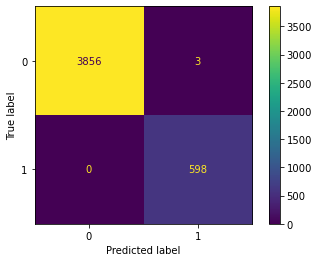

In [131]:
plot_confusion_matrix(lr,x_train,y_train)

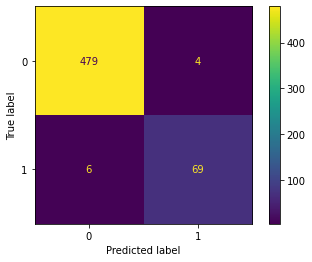

In [132]:
plot_confusion_matrix(lr,x_valid,y_valid)

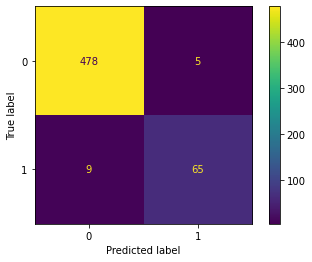

In [133]:
plot_confusion_matrix(lr,x_test,y_test)

In [134]:
#Decision Tree
dt=DecisionTreeClassifier(max_depth=20,class_weight='balanced')

In [135]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=20)

In [136]:
pd.DataFrame(data=[accuracy_score(y_train,dt.predict(x_train)), recall_score(y_train, dt.predict(x_train)),
                   precision_score(y_train, dt.predict(x_train)),f1_score(y_train,dt.predict(x_train))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.979583
recall     0.941472
precision  0.909532
f1_score   0.925226

In [137]:
pd.DataFrame(data=[accuracy_score(y_valid,dt.predict(x_valid)), recall_score(y_valid, dt.predict(x_valid)),
                   precision_score(y_valid, dt.predict(x_valid)),f1_score(y_valid,dt.predict(x_valid))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.946237
recall     0.866667
precision  0.764706
f1_score   0.812500

In [112]:
from lightgbm import LGBMClassifier

In [143]:
lgb=LGBMClassifier(is_unbalance=True)

In [144]:
lgb.fit(x_train,y_train)

LGBMClassifier(is_unbalance=True)

In [145]:
pd.DataFrame(data=[accuracy_score(y_train,lgb.predict(x_train)), recall_score(y_train, lgb.predict(x_train)),
                   precision_score(y_train, lgb.predict(x_train)),f1_score(y_train,lgb.predict(x_train))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.987884
recall     0.988294
precision  0.926332
f1_score   0.956311

In [146]:
pd.DataFrame(data=[accuracy_score(y_valid,lgb.predict(x_valid)), recall_score(y_valid, lgb.predict(x_valid)),
                   precision_score(y_valid, lgb.predict(x_valid)),f1_score(y_valid,lgb.predict(x_valid))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.962366
recall     0.933333
precision  0.813953
f1_score   0.869565

In [154]:
#Bagging
b=BaggingClassifier(base_estimator=lr,n_estimators=100,oob_score=True)

In [155]:
b.fit(x_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(class_weight='balanced',
                                                    solver='liblinear'),
                  n_estimators=100, oob_score=True)

In [156]:
pd.DataFrame(data=[accuracy_score(y_train,b.predict(x_train)), recall_score(y_train, b.predict(x_train)),
                   precision_score(y_train, b.predict(x_train)),f1_score(y_train,b.predict(x_train))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.998429
recall     0.993311
precision  0.994975
f1_score   0.994142

In [157]:
pd.DataFrame(data=[accuracy_score(y_valid,b.predict(x_valid)), recall_score(y_valid, b.predict(x_valid)),
                   precision_score(y_valid, b.predict(x_valid)),f1_score(y_valid,b.predict(x_valid))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.980287
recall     0.906667
precision  0.944444
f1_score   0.925170

In [158]:
pd.DataFrame(data=[accuracy_score(y_test,b.predict(x_test)), recall_score(y_test, b.predict(x_test)),
                   precision_score(y_test, b.predict(x_test)),f1_score(y_test,b.predict(x_test))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.974865
recall     0.864865
precision  0.941176
f1_score   0.901408

In [159]:
ab=AdaBoostClassifier()

In [160]:
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [161]:
pd.DataFrame(data=[accuracy_score(y_train,ab.predict(x_train)), recall_score(y_train, ab.predict(x_train)),
                   precision_score(y_train, ab.predict(x_train)),f1_score(y_train,ab.predict(x_train))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.977788
recall     0.862876
precision  0.968105
f1_score   0.912467

In [162]:
pd.DataFrame(data=[accuracy_score(y_valid,ab.predict(x_valid)), recall_score(y_valid, ab.predict(x_valid)),
                   precision_score(y_valid, ab.predict(x_valid)),f1_score(y_valid,ab.predict(x_valid))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.965950
recall     0.826667
precision  0.911765
f1_score   0.867133

In [163]:
#Random forest
rf=RandomForestClassifier(max_depth=6,class_weight='balanced')

In [164]:
rf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6)

In [165]:
pd.DataFrame(data=[accuracy_score(y_train,rf.predict(x_train)), recall_score(y_train, rf.predict(x_train)),
                   precision_score(y_train, rf.predict(x_train)),f1_score(y_train,rf.predict(x_train))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.975095
recall     0.832776
precision  0.978389
f1_score   0.899729

In [166]:
pd.DataFrame(data=[accuracy_score(y_valid,rf.predict(x_valid)), recall_score(y_valid, rf.predict(x_valid)),
                   precision_score(y_valid, rf.predict(x_valid)),f1_score(y_valid,rf.predict(x_valid))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.965950
recall     0.800000
precision  0.937500
f1_score   0.863309

In [167]:
from sklearn.svm import SVC

In [168]:
SVM=SVC()

In [169]:
SVM.fit(x_train,y_train)

SVC()

In [170]:
pd.DataFrame(data=[accuracy_score(y_train,SVM.predict(x_train)), recall_score(y_train, SVM.predict(x_train)),
                   precision_score(y_train, SVM.predict(x_train)),f1_score(y_train,SVM.predict(x_train))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.995737
recall     0.968227
precision  1.000000
f1_score   0.983857

In [171]:
pd.DataFrame(data=[accuracy_score(y_valid,SVM.predict(x_valid)), recall_score(y_valid, SVM.predict(x_valid)),
                   precision_score(y_valid, SVM.predict(x_valid)),f1_score(y_valid,SVM.predict(x_valid))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.976703
recall     0.826667
precision  1.000000
f1_score   0.905109

In [172]:
pd.DataFrame(data=[accuracy_score(y_test,SVM.predict(x_test)), recall_score(y_test, SVM.predict(x_test)),
                   precision_score(y_test, SVM.predict(x_test)),f1_score(y_test,SVM.predict(x_test))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.980251
recall     0.851351
precision  1.000000
f1_score   0.919708

In [174]:
#Models on TFIDF Vectors
x_train1,x_test1,y_train1,y_test1=tts(tfidf_vectors,data.Labels,stratify=data.Labels,random_state=365,test_size=0.2)
x_test1,x_valid1,y_test1,y_valid1=tts(x_test1,y_test1,stratify=y_test1,random_state=365,test_size=0.5)

In [175]:
#Logistic Regression
lr.fit(x_train1,y_train1)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [176]:
pd.DataFrame(data=[accuracy_score(y_train1,lr.predict(x_train1)), recall_score(y_train1, lr.predict(x_train1)),
                   precision_score(y_train1, lr.predict(x_train1)),f1_score(y_train1,lr.predict(x_train1))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.991474
recall     0.994983
precision  0.944444
f1_score   0.969055

In [177]:
pd.DataFrame(data=[accuracy_score(y_valid1,lr.predict(x_valid1)), recall_score(y_valid1, lr.predict(x_valid1)),
                   precision_score(y_valid1, lr.predict(x_valid1)),f1_score(y_valid1,lr.predict(x_valid1))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.973118
recall     0.906667
precision  0.894737
f1_score   0.900662

In [178]:
pd.DataFrame(data=[accuracy_score(y_test1,lr.predict(x_test1)), recall_score(y_test1, lr.predict(x_test1)),
                   precision_score(y_test1, lr.predict(x_test1)),f1_score(y_test1,lr.predict(x_test1))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.973070
recall     0.891892
precision  0.904110
f1_score   0.897959

In [116]:
#Decision Tree
dt.fit(x_train1,y_train1)

DecisionTreeClassifier(class_weight='balanced', max_depth=20)

In [117]:
pd.DataFrame(data=[accuracy_score(y_train1,dt.predict(x_train1)), recall_score(y_train1, dt.predict(x_train1)),
                   precision_score(y_train1, dt.predict(x_train1)),f1_score(y_train1,dt.predict(x_train1))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.986987
recall     0.944816
precision  0.957627
f1_score   0.951178

In [118]:
pd.DataFrame(data=[accuracy_score(y_valid1,dt.predict(x_valid1)), recall_score(y_valid1, dt.predict(x_valid1)),
                   precision_score(y_valid1, dt.predict(x_valid1)),f1_score(y_valid1,dt.predict(x_valid1))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.956989
recall     0.840000
precision  0.840000
f1_score   0.840000

In [119]:
#bagging
b.fit(x_train1,y_train1)

BaggingClassifier()

In [120]:
pd.DataFrame(data=[accuracy_score(y_train1,b.predict(x_train1)), recall_score(y_train1, b.predict(x_train1)),
                   precision_score(y_train1, b.predict(x_train1)),f1_score(y_train1,b.predict(x_train1))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.995288
recall     0.973244
precision  0.991482
f1_score   0.982278

In [121]:
pd.DataFrame(data=[accuracy_score(y_valid1,b.predict(x_valid1)), recall_score(y_valid1, b.predict(x_valid1)),
                   precision_score(y_valid1, b.predict(x_valid1)),f1_score(y_valid1,b.predict(x_valid1))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.969534
recall     0.840000
precision  0.926471
f1_score   0.881119

In [122]:
#adaboost
ab.fit(x_train1,y_train1)

AdaBoostClassifier()

In [123]:
pd.DataFrame(data=[accuracy_score(y_train1,ab.predict(x_train1)), recall_score(y_train1, ab.predict(x_train1)),
                   precision_score(y_train1, ab.predict(x_train1)),f1_score(y_train1,ab.predict(x_train1))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.978461
recall     0.852843
precision  0.984556
f1_score   0.913978

In [124]:
pd.DataFrame(data=[accuracy_score(y_valid1,ab.predict(x_valid1)), recall_score(y_valid1, ab.predict(x_valid1)),
                   precision_score(y_valid1, ab.predict(x_valid1)),f1_score(y_valid1,ab.predict(x_valid1))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.962366
recall     0.786667
precision  0.921875
f1_score   0.848921

In [125]:
#random forest
rf.fit(x_train1,y_train1)

RandomForestClassifier(class_weight='balanced', max_depth=6)

In [126]:
pd.DataFrame(data=[accuracy_score(y_train1,rf.predict(x_train1)), recall_score(y_train1, rf.predict(x_train1)),
                   precision_score(y_train1, rf.predict(x_train1)),f1_score(y_train1,rf.predict(x_train1))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.970384
recall     0.794314
precision  0.981405
f1_score   0.878004

In [127]:
pd.DataFrame(data=[accuracy_score(y_valid1,rf.predict(x_valid1)), recall_score(y_valid1, rf.predict(x_valid1)),
                   precision_score(y_valid1, rf.predict(x_valid1)),f1_score(y_valid1,rf.predict(x_valid1))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.974910
recall     0.853333
precision  0.955224
f1_score   0.901408

In [128]:
SVM.fit(x_train1,y_train1)

SVC()

In [129]:
pd.DataFrame(data=[accuracy_score(y_train1, SVM.predict(x_train1)),recall_score(y_train1,SVM.predict(x_train1))
                   ,precision_score(y_train1, SVM.predict(x_train1)),f1_score(y_train1,SVM.predict(x_train1))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.998205
recall     0.986622
precision  1.000000
f1_score   0.993266

In [130]:
pd.DataFrame(data=[accuracy_score(y_valid1,SVM.predict(x_valid1)), recall_score(y_valid1, SVM.predict(x_valid1)),
                   precision_score(y_valid1, SVM.predict(x_valid1)),f1_score(y_valid1,SVM.predict(x_valid1))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.973118
recall     0.800000
precision  1.000000
f1_score   0.888889

In [131]:
#Models on Doc2Vectors
x_train2,x_test2,y_train2,y_test2=tts(doc2vector1,data2.Labels,stratify=data2.Labels,random_state=365,test_size=0.2)
x_test2,x_valid2,y_test2,y_valid2=tts(x_test2,y_test2,stratify=y_test2,random_state=365,test_size=0.5)

In [132]:
#Logistic Regression
lr.fit(x_train2,y_train2)

LogisticRegression(class_weight='balanced')

In [133]:
pd.DataFrame(data=[accuracy_score(y_train2,lr.predict(x_train2)), recall_score(y_train2, lr.predict(x_train2)),
                   precision_score(y_train2, lr.predict(x_train2)),f1_score(y_train2,lr.predict(x_train2))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.989637
recall     0.988255
precision  0.937898
f1_score   0.962418

In [134]:
pd.DataFrame(data=[accuracy_score(y_valid2,lr.predict(x_valid2)), recall_score(y_valid2, lr.predict(x_valid2)),
                   precision_score(y_valid2, lr.predict(x_valid2)),f1_score(y_valid2,lr.predict(x_valid2))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.960360
recall     0.837838
precision  0.861111
f1_score   0.849315

In [135]:
#decision tree
dt.fit(x_train2,y_train2)

DecisionTreeClassifier(class_weight='balanced', max_depth=20)

In [136]:
pd.DataFrame(data=[accuracy_score(y_train2,dt.predict(x_train2)), recall_score(y_train2, dt.predict(x_train2)),
                   precision_score(y_train2, dt.predict(x_train2)),f1_score(y_train2,dt.predict(x_train2))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.997747
recall     1.000000
precision  0.983498
f1_score   0.991681

In [137]:
pd.DataFrame(data=[accuracy_score(y_valid2,dt.predict(x_valid2)), recall_score(y_valid2, dt.predict(x_valid2)),
                   precision_score(y_valid2, dt.predict(x_valid2)),f1_score(y_valid2,dt.predict(x_valid2))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.938739
recall     0.716216
precision  0.803030
f1_score   0.757143

In [138]:
#bagging
b.fit(x_train2,y_train2)

BaggingClassifier()

In [139]:
pd.DataFrame(data=[accuracy_score(y_train2,b.predict(x_train2)), recall_score(y_train2, b.predict(x_train2)),
                   precision_score(y_train2, b.predict(x_train2)),f1_score(y_train2,b.predict(x_train2))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.996396
recall     0.974832
precision  0.998282
f1_score   0.986418

In [140]:
pd.DataFrame(data=[accuracy_score(y_valid2,b.predict(x_valid2)), recall_score(y_valid2, b.predict(x_valid2)),
                   precision_score(y_valid2, b.predict(x_valid2)),f1_score(y_valid2,b.predict(x_valid2))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.956757
recall     0.743243
precision  0.916667
f1_score   0.820896

In [141]:
#adaboost
ab.fit(x_train2,y_train2)

AdaBoostClassifier()

In [142]:
pd.DataFrame(data=[accuracy_score(y_train2,ab.predict(x_train2)), recall_score(y_train2, ab.predict(x_train2)),
                   precision_score(y_train2, ab.predict(x_train2)),f1_score(y_train2,ab.predict(x_train2))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.983555
recall     0.914430
precision  0.961199
f1_score   0.937231

In [143]:
pd.DataFrame(data=[accuracy_score(y_valid2,ab.predict(x_valid2)), recall_score(y_valid2, ab.predict(x_valid2)),
                   precision_score(y_valid2, ab.predict(x_valid2)),f1_score(y_valid2,ab.predict(x_valid2))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.956757
recall     0.756757
precision  0.903226
f1_score   0.823529

In [144]:
#Random Forest
rf.fit(x_train2,y_train2)

RandomForestClassifier(class_weight='balanced', max_depth=6)

In [145]:
pd.DataFrame(data=[accuracy_score(y_train2,rf.predict(x_train2)), recall_score(y_train2, rf.predict(x_train2)),
                   precision_score(y_train2, rf.predict(x_train2)),f1_score(y_train2,rf.predict(x_train2))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.988736
recall     0.956376
precision  0.959596
f1_score   0.957983

In [146]:
pd.DataFrame(data=[accuracy_score(y_valid2,rf.predict(x_valid2)), recall_score(y_valid2, rf.predict(x_valid2)),
                   precision_score(y_valid2, rf.predict(x_valid2)),f1_score(y_valid2,rf.predict(x_valid2))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.962162
recall     0.797297
precision  0.907692
f1_score   0.848921

In [147]:
#SVM
SVM.fit(x_train2,y_train2)

SVC()

In [148]:
pd.DataFrame(data=[accuracy_score(y_train2,SVM.predict(x_train2)), recall_score(y_train2, SVM.predict(x_train2)),
                   precision_score(y_train2, SVM.predict(x_train2)),f1_score(y_train2,SVM.predict(x_train2))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.989187
recall     0.929530
precision  0.989286
f1_score   0.958478

In [149]:
pd.DataFrame(data=[accuracy_score(y_valid2,SVM.predict(x_valid2)), recall_score(y_valid2, SVM.predict(x_valid2)),
                   precision_score(y_valid2, SVM.predict(x_valid2)),f1_score(y_valid2,SVM.predict(x_valid2))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.965766
recall     0.783784
precision  0.950820
f1_score   0.859259

In [150]:
#Model fitted on TF Weights performed best,the model was LogisticRegression.

In [151]:
#Fitting same model on Reduced versions of TF Weights.

In [152]:
x_trainr,x_testr,y_trainr,y_testr=tts(DTM1,data.Labels,stratify=data.Labels,test_size=0.2)
x_testr,x_validr,y_testr,y_validr=tts(x_testr,y_testr,stratify=y_testr,test_size=0.5)

In [153]:
lr.fit(x_trainr,y_trainr)

LogisticRegression(class_weight='balanced')

In [154]:
pd.DataFrame(data=[accuracy_score(y_trainr,lr.predict(x_trainr)), recall_score(y_trainr, lr.predict(x_trainr)),
                   precision_score(y_trainr, lr.predict(x_trainr)),f1_score(y_trainr,lr.predict(x_trainr))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.958268
recall     0.923077
precision  0.797688
f1_score   0.855814

In [155]:
pd.DataFrame(data=[accuracy_score(y_validr,lr.predict(x_validr)), recall_score(y_validr, lr.predict(x_validr)),
                   precision_score(y_validr, lr.predict(x_validr)),f1_score(y_validr,lr.predict(x_validr))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.953405
recall     0.880000
precision  0.795181
f1_score   0.835443

In [156]:
#On PCA transformed TF
x_trainp,x_testp,y_trainp,y_testp=tts(pca_dtm,data.Labels,stratify=data.Labels,test_size=0.2)
x_testp,x_validp,y_testp,y_validp=tts(x_testp,y_testp,stratify=y_testp,test_size=0.5)

In [157]:
lr.fit(x_trainp,y_trainp)

LogisticRegression(class_weight='balanced')

In [158]:
pd.DataFrame(data=[accuracy_score(y_trainp,lr.predict(x_trainp)), recall_score(y_trainp, lr.predict(x_trainp)),
                   precision_score(y_trainp, lr.predict(x_trainp)),f1_score(y_trainp,lr.predict(x_trainp))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.999551
recall     0.998328
precision  0.998328
f1_score   0.998328

In [159]:
pd.DataFrame(data=[accuracy_score(y_validp,lr.predict(x_validp)), recall_score(y_validp, lr.predict(x_validp)),
                   precision_score(y_validp, lr.predict(x_validp)),f1_score(y_validp,lr.predict(x_validp))], 
             index=["accuracy", "recall", "precision","f1_score"])

0
accuracy   0.983871
recall     0.893333
precision  0.985294
f1_score   0.937063